In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import networkx as nx

df = pd.read_json("../data/processed/2022-12-14-tag-rules/association_rules.json")
df

,antecedent,consequent,confidence,lift,support
0,"[Long Strip, Full Color, Comedy]",[Drama],0.405777,1.333096,0.013729
1,"[Long Strip, Full Color, Comedy]",[Romance],0.622650,1.554130,0.021066
2,"[Long Strip, Full Color, Comedy]",[Web Comic],0.868409,5.420325,0.029381
3,"[Long Strip, Full Color, Comedy]",[Fantasy],0.371389,1.919907,0.012565
4,"[Magic, Adventure, Fantasy]",[Adaptation],0.523274,7.983992,0.010114
...,...,...,...,...,...
2381,"[Adventure, Slice of Life]",[Action],0.629505,3.510722,0.011650
2382,"[Long Strip, Full Color, Web Comic, Action, Fa...",[Adventure],0.615312,5.484716,0.010099
2383,"[Web Comic, Action, Fantasy]",[Full Color],0.823651,5.667186,0.018475
2384,"[Web Comic, Action, Fantasy]",[Long Strip],0.771093,5.472008,0.017296


In [15]:
df["antecedent_str"] = df.antecedent.apply(lambda x: ", ".join(x))
df["consequent_str"] = df.consequent.apply(lambda x: ", ".join(x))

le = LabelEncoder()
labels = pd.concat([df.antecedent_str, df.consequent_str]).unique()
le.fit(labels)

df["antecedent_label"] = le.transform(df.antecedent_str)
df["consequent_label"] = le.transform(df.consequent_str)
df

,antecedent,consequent,confidence,lift,support,antecedent_str,consequent_str,antecedent_label,consequent_label
0,"[Long Strip, Full Color, Comedy]",[Drama],0.405777,1.333096,0.013729,"Long Strip, Full Color, Comedy",Drama,252,132
1,"[Long Strip, Full Color, Comedy]",[Romance],0.622650,1.554130,0.021066,"Long Strip, Full Color, Comedy",Romance,252,401
2,"[Long Strip, Full Color, Comedy]",[Web Comic],0.868409,5.420325,0.029381,"Long Strip, Full Color, Comedy",Web Comic,252,533
3,"[Long Strip, Full Color, Comedy]",[Fantasy],0.371389,1.919907,0.012565,"Long Strip, Full Color, Comedy",Fantasy,252,136
4,"[Magic, Adventure, Fantasy]",[Adaptation],0.523274,7.983992,0.010114,"Magic, Adventure, Fantasy",Adaptation,313,16
...,...,...,...,...,...,...,...,...,...
2381,"[Adventure, Slice of Life]",[Action],0.629505,3.510722,0.011650,"Adventure, Slice of Life",Action,95,1
2382,"[Long Strip, Full Color, Web Comic, Action, Fa...",[Adventure],0.615312,5.484716,0.010099,"Long Strip, Full Color, Web Comic, Action, Fan...",Adventure,267,56
2383,"[Web Comic, Action, Fantasy]",[Full Color],0.823651,5.667186,0.018475,"Web Comic, Action, Fantasy",Full Color,536,145
2384,"[Web Comic, Action, Fantasy]",[Long Strip],0.771093,5.472008,0.017296,"Web Comic, Action, Fantasy",Long Strip,536,230


In [40]:
gephi = df[["antecedent_str", "consequent_str", "confidence"]]
gephi.columns = ["Source", "Target", "Weight"]
gephi.to_csv(
    "../data/processed/2022-12-14-tag-rules/association_rules_processed.csv",
    index=False,
)

In [24]:
G = nx.from_pandas_edgelist(
    df,
    source="antecedent_label",
    target="consequent_label",
    create_using=nx.DiGraph,
)
len(G.nodes()), len(G.edges())

(555, 2386)

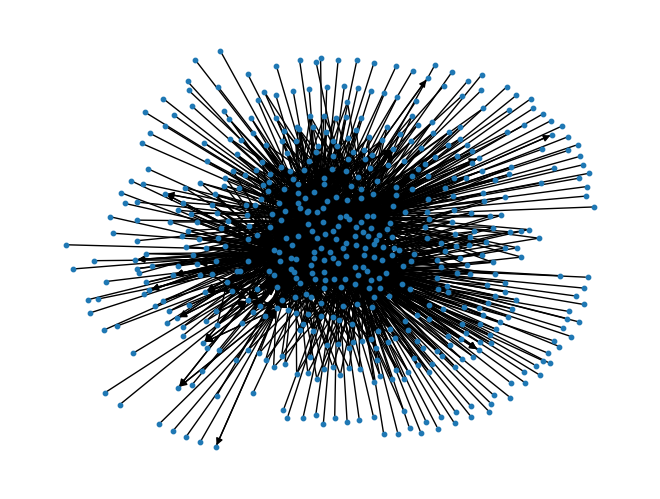

In [34]:
# small dots
nx.draw(G, node_size=10)

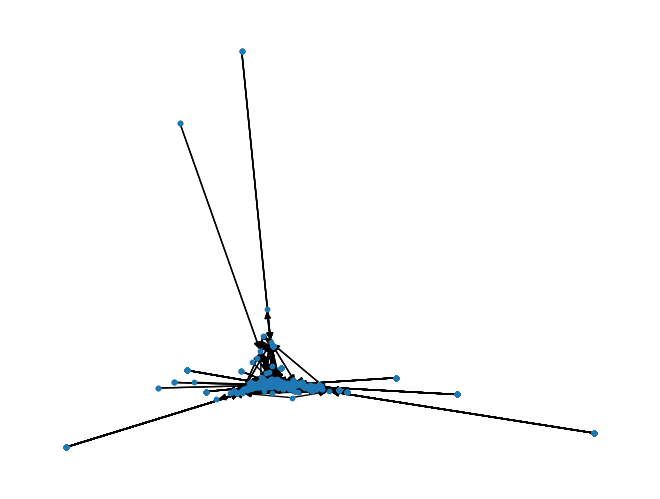

In [33]:
nx.draw_spectral(G, node_size=10)